# Explore here

In [16]:
import pandas as pd

data_diab = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
data_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
data_diab.shape

(768, 9)

In [18]:
data_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Existen un total de 768 filas  y 9 columnas, de entre las que encontramos el objetivo o clase a predecir, Outcome                   .
Ninguna variable cuenta con valores nulos.
Los datos cuentan con 9 características numéricas.

Eliminar duplicados

In [19]:
data_diab.drop("Outcome", axis = 1).duplicated().sum()

np.int64(0)

En este caso, no encontramos ningún valor duplicado.

Análisis de variables univariante
Análisis sobre variables numéricas

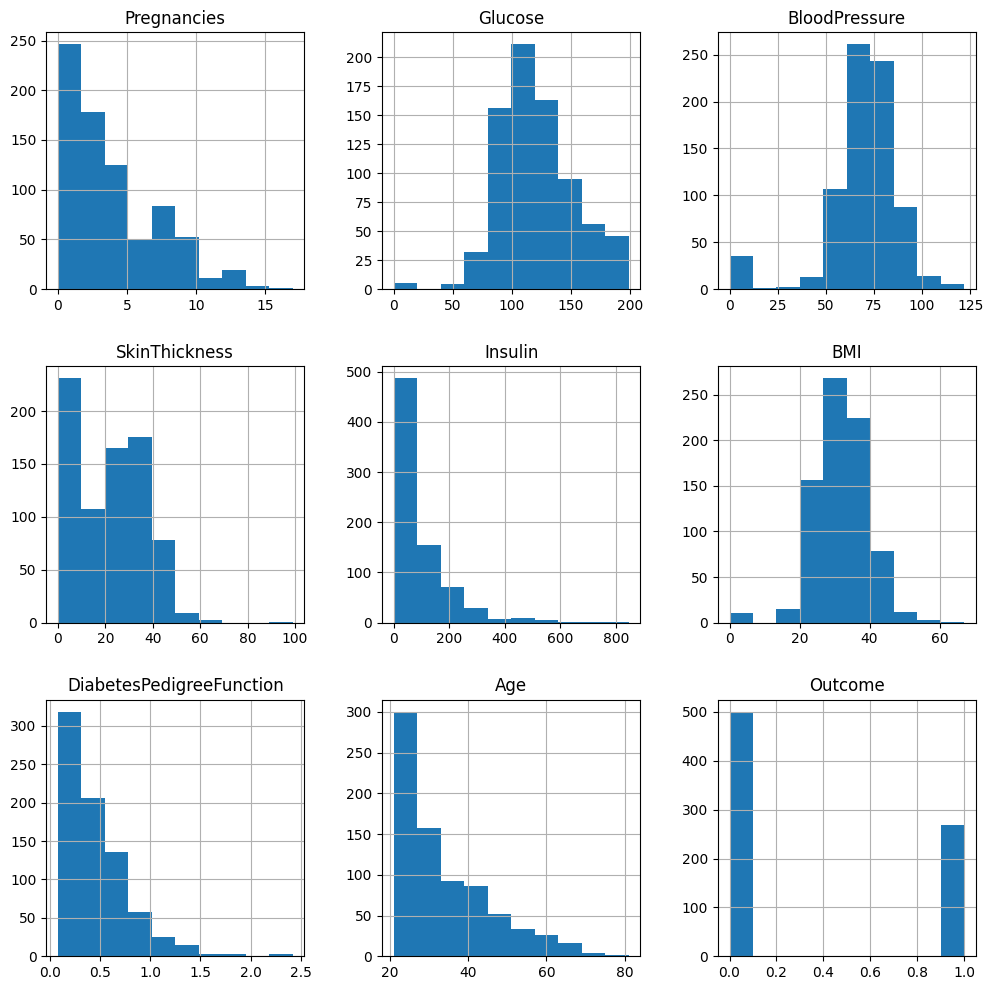

In [20]:
import matplotlib.pyplot as plt 

data_diab.hist(figsize=(12,12))
plt.show()

Pregnancies: entre 0 y 1 sus valores ascienden a 250 para luego ir descendiendo de manera positiva.
Glucose: entre 100 y 120 aproximadamente asciende a 250 y luego se distribuye en ambos lados a la izquierda con valores menores que en la cola positiva o de la derecha.
BloodPressure: presenta valores elevados entre 60 y 90 y se distruye de manera uniforme hacia ambos lados.
SkinThickness: valores elevados entre 0 y 10 y entre 20 y 40, el resto de la distribucion es variable.
Insulin: entre 0 y 10 asciende a 500 y de 10 a 800 va descendiendo en forma positiva.
BMI: entre 30 y 40 los valores ascienden a 250-300, luego se distribuyen de manera uniforme hacia ambos lados.
DiabetesPedigreeFunction: toma su valor mas alto en 300 entre 0.0 y 0.3 luego va descendiendo de forma positiva para el resto de los valores hasta 2.5.
Age: asciende a 300 entre 20 y 30 y luego va descendiendo de forma positiva para el resto de los valores.
Outcome: entre 0.0 y 0.1 asciende a 500 y entre 0.7 y 1.0 asciende a 280 aproximadamente
                                          

Análisis de variables multivariante
Análisis numérico-numérico

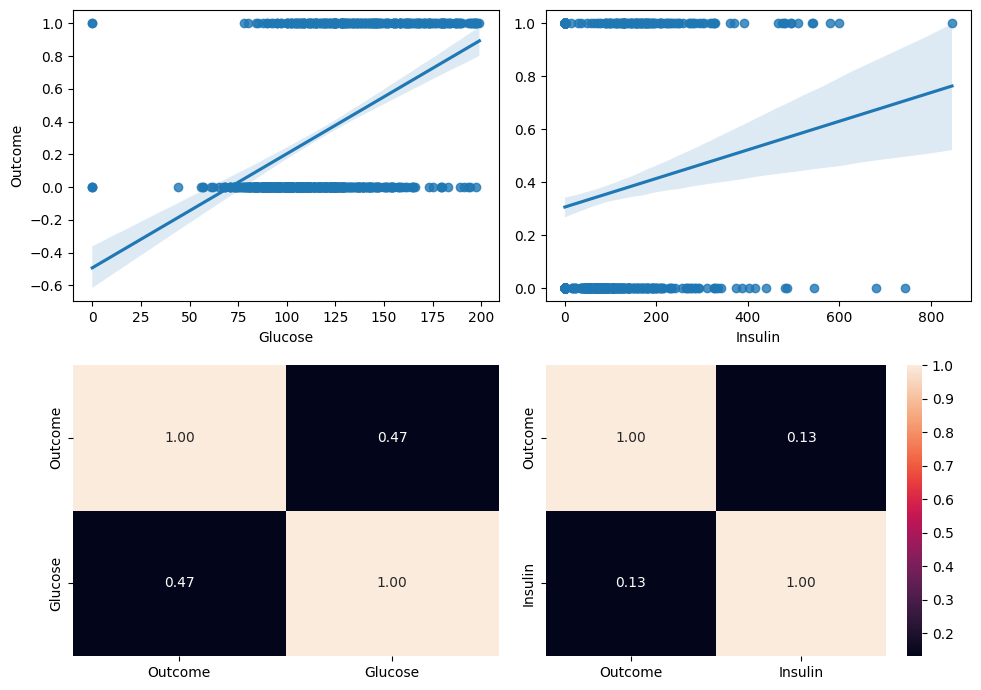

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_diab, x = "Glucose", y = "Outcome")
sns.heatmap(data_diab[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_diab, x = "Insulin", y = "Outcome").set(ylabel=None)
sns.heatmap(data_diab[["Outcome", "Insulin"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Outcome vs Glucose: a medida que aumenta la glucosa, la probabilidad de que Outcome sea 1 también aumenta. - La zona azul clara alrededor de la línea. Hay una relación positiva entre glucosa y Outcome. Niveles más altos de glucosa están asociados con una mayor probabilidad de que Outcome sea 1. Mientras que el diagrama de correlacion nos muestra un valor de 0.47 entre Outcome y Glucose.
Outcome vs Insulin: Hay una relación positiva entre insulina y Outcome, pero es más débil y menos segura que la relación con glucosa. Mientra que el diagrama de correlacion nos muestra un valor de 0.13 para Outcome vs Insulin.
Ambos gráficos sugieren que a medida que aumentan los niveles de glucosa o insulina, la probabilidad de que Outcome sea 1 aumenta. - La relación con glucosa parece más fuerte y más clara que con insulina. - Esto puede indicar que la glucosa es un mejor predictor del Outcome en este conjunto de datos. 


Análisis de correlaciones


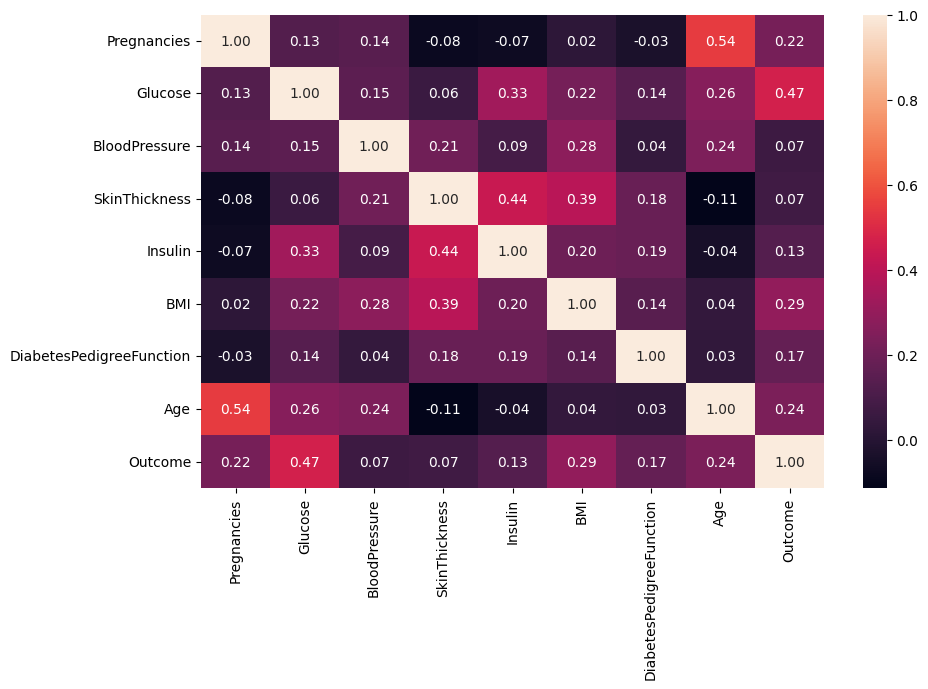

In [22]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(data_diab[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

La correlacion mas importante que podemos destacar es entre Outcome y Glucose con un valor de 0.47, tambien podemos destacar la correlacion entre SkinThickness e Insulin con un valor de 0.44, o esta misma variable con BMI presentando un valor de 0.39 y con BloodPressure de 0.21. Por otro lado la variable age presenta una correlacion de 0.24 con la variable objetivo en este caso Outcome y 0.54 con Pregnancies. Estos son los valores mas significativos que presenta el diagrama, el resto de valores no preentan significancia al analisis.

Análisis de outliers

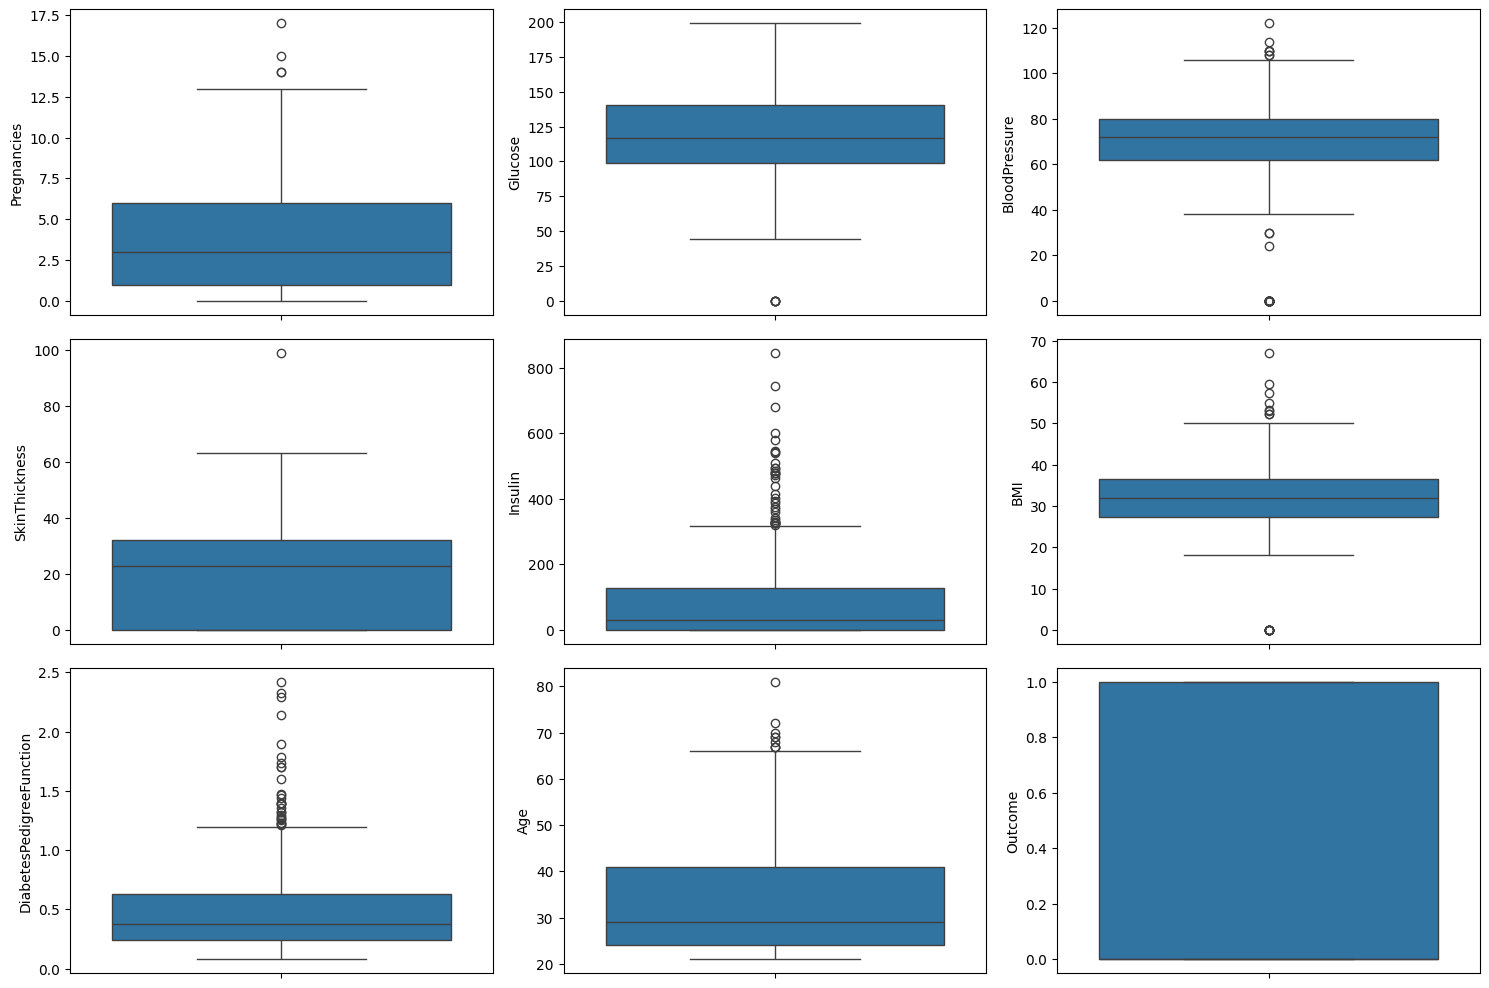

In [23]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = data_diab, y = "Pregnancies")
sns.boxplot(ax = axis[0, 1], data = data_diab, y = "Glucose")
sns.boxplot(ax = axis[0, 2], data = data_diab, y = "BloodPressure")
sns.boxplot(ax = axis[1, 0], data = data_diab, y = "SkinThickness")
sns.boxplot(ax = axis[1, 1], data = data_diab, y = "Insulin")
sns.boxplot(ax = axis[1, 2], data = data_diab, y = "BMI")
sns.boxplot(ax = axis[2, 0], data = data_diab, y = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[2, 1], data = data_diab, y = "Age")
sns.boxplot(ax = axis[2, 2], data = data_diab, y = "Outcome")

plt.tight_layout()

plt.show()

Vamos a evaluar la eliminacion de los outlier de la variable Insulin 

In [24]:
Insulin_stats = data_diab["Insulin"].describe()
Insulin_stats

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [25]:
Insulin_iqr = Insulin_stats["75%"] - Insulin_stats["25%"]
upper_limit = Insulin_stats["75%"] + 1.5 * Insulin_iqr
lower_limit = Insulin_stats["25%"] - 1.5 * Insulin_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(Insulin_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 318.12 y -190.88, con un rango intercuartílico de 127.25


In [26]:
data_diab[data_diab["Insulin"] > 300]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
54,7,150,66,42,342,34.7,0.718,42,0
56,7,187,68,39,304,37.7,0.254,41,1
111,8,155,62,26,495,34.0,0.543,46,1
139,5,105,72,29,325,36.9,0.159,28,0
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
199,4,148,60,27,318,30.9,0.150,29,1
220,0,177,60,29,478,34.6,1.072,21,1


En este caso vemos que la mayoria de los casos representa un outcome de 1 , es decir con Diabetes positivo por lo tanto no nos convendria eliminar los outliers y los pocos casos que son negativos no representan valores en Insulin muy superiores a 300.